In [1]:
from IPython.display import display, Image
from pprint import pprint

from ginv import *
sympy.init_printing()

In [2]:
Monom.cmp = Monom.TOPdeglex

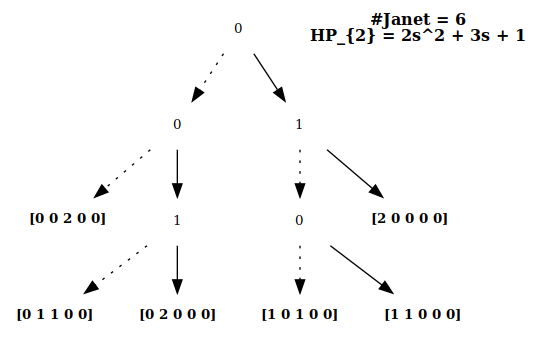

In [3]:
var = ['a', 'b', 'c', 'd', 'e']
fun = []
Monom.init(var, fun)
for i, g in enumerate(var):
    globals()[g] = Poly(Monom(i))

pommaret = JanetCache()
q = pommaret.insert(Wrap(p) for p in (\
a**2 - b*e,\
a*b - c*e,\
b**2 - d*e,\
a*c - d*e,\
b*c - a*d,\
c**2 - d*b,\
))
assert q == []
pommaret.saveImage('pommaret.png')
Image('./pommaret.png')

In [4]:
assert pommaret.degMinProlong() == 2
q = Q(pommaret.prolong(2))
print(len(q))
assert q.reduceMinDegree(pommaret) == []

8


In [5]:
pommaret.reduction

<bound method Janet.reduction of <janet.JanetCache object at 0x7fadb429c090>>

prolong 0, Q 1
x1
prolong 0, Q 2
x2**2
prolong 2, Q 3
x2*x3**2
prolong 3, Q 4
x2*x3*x4**2
prolong 4, Q 0
x2*x4**4, x3**3*x4**2
prolong 5, Q 0
x3**2*x4**4
prolong 6, Q 0
prolong 0, Q 0
    crit1: 6
    crit2: 0
     time: 0.02 sec
    count: 7
reduction: 54
       HP: 4s + 6


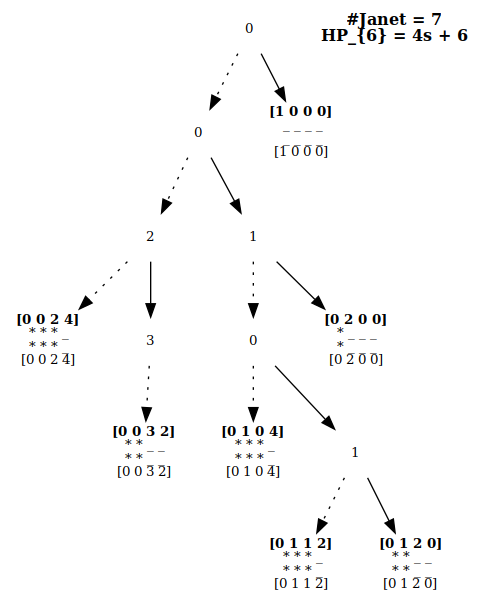

In [6]:
var = ['x1', 'x2', 'x3', 'x4']
fun = []
Monom.init(var, fun)
for i, g in enumerate(var):
    globals()[g] = Poly(Monom(i))
cyclic4 = Janet()
res = ginvBlockLow((
x1+x2+x3+x4,\
x1*x2+x2*x3+x3*x4+x4*x1,\
x1*x2*x3+x2*x3*x4+x3*x4*x1+x4*x1*x2,\
x1*x2*x3*x4-1), \
cyclic4, level=1)
print(f"    crit1: {res[1]}")
print(f"    crit2: {res[2]}")
print(f"     time: {res[0]:.2f} sec")
print(f"    count: {cyclic4.count()}")
print(f"reduction: {cyclic4.reduction()}")
print(f"       HP: {cyclic4.HP()}")
cyclic4.saveImage('cyclic4.png', level=3)
Image('./cyclic4.png')

prolong 0, Q 1
x1
prolong 0, Q 2
x2**2
prolong 2, Q 3
x2*x3**2
prolong 3, Q 4
x2*x3*x4**2, x3**3*x4
prolong 4, Q 5
x2*x3*x4*x5**2, x3**2*x4**3, x3**2*x4**2*x5
prolong 5, Q 0
x2*x4**3*x5**2, x3**3*x5**3, x3*x4**3*x5**2, x3*x4**4*x5, x3**4*x5**2, x2*x4**4*x5
prolong 4, Q 0
x3**4*x4
prolong 5, Q 0
prolong 6, Q 0
x2*x4**2*x5**4, x4**4*x5**3, x3*x4**2*x5**4, x4**3*x5**4, x2*x3*x5**5, x4**5*x5**2
prolong 7, Q 0
x3**3
prolong 3, Q 4
x2*x4**3, x3**2*x4**2
prolong 4, Q 5
x3*x4**3*x5, x3*x4**4, x4**5, x4**4*x5
prolong 5, Q 6
x2*x5**5, x2*x4**2*x5**3, x3*x4**2*x5**3
prolong 6, Q 7
x2*x4*x5**5
prolong 7, Q 7
x3*x4*x5**5, x3**2*x5**5
prolong 7, Q 8
x4**2*x5**6
prolong 8, Q 8
x3*x5**7, x4*x5**7, x5**8, x3**2*x4*x5**5
prolong 8, Q 0
x3*x4**3
prolong 4, Q 5
x4**4
prolong 4, Q 5
prolong 0, Q 0
crit1: 40
crit2: 1
 time: 1.09 sec
    count: 23
reduction: 1375
       HP: 70


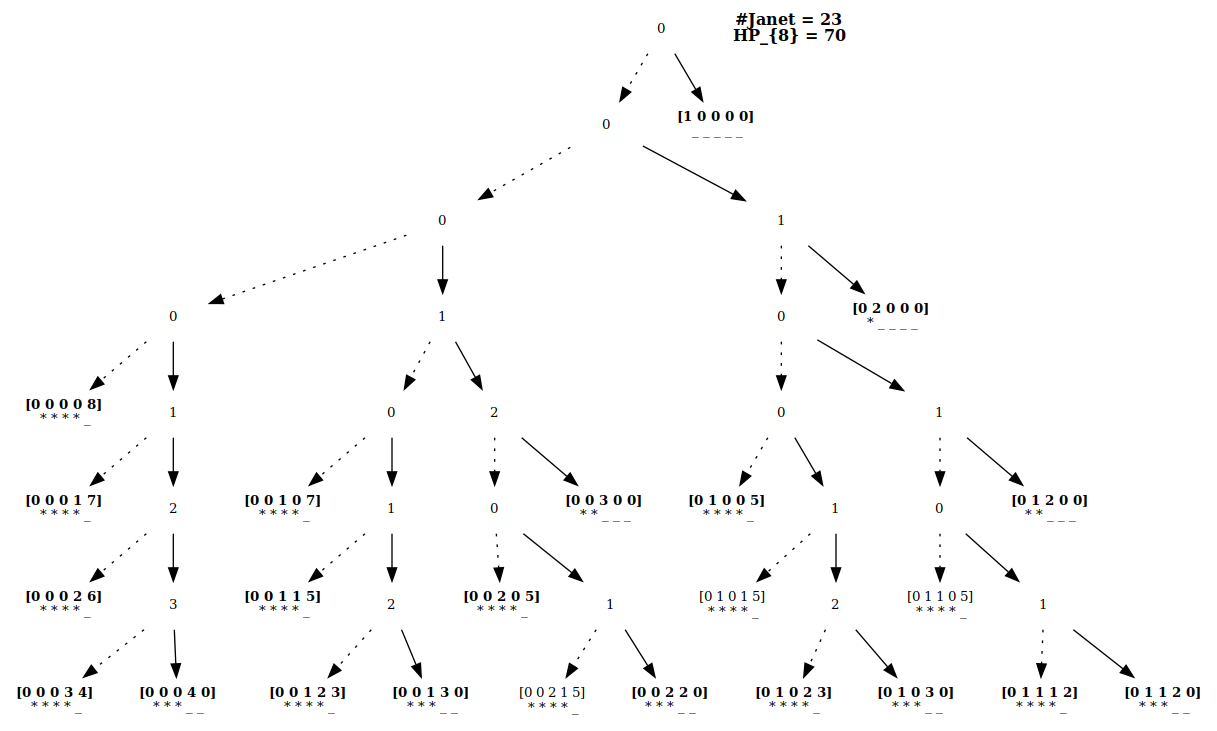

In [7]:
var = ['x1', 'x2', 'x3', 'x4', 'x5']
fun = []
Monom.init(var, fun)
for i, g in enumerate(var):
    globals()[g] = Poly(Monom(i))
cyclic5 = Janet()
# cyclic5 = JanetCache()
res = ginvBlockLow((
x1+x2+x3+x4+x5,
x1*x2+x1*x5+x2*x3+x3*x4+x4*x5,
x1*x2*x3+x1*x2*x5+x1*x4*x5+x2*x3*x4+x3*x4*x5,
x1*x2*x3*x4+x1*x2*x3*x5+x1*x2*x4*x5+x1*x3*x4*x5+x2*x3*x4*x5,
x1*x2*x3*x4*x5-1), \
cyclic5, level=1)
print(f"crit1: {res[1]}")
print(f"crit2: {res[2]}")
print(f" time: {res[0]:.2f} sec")
print(f"    count: {cyclic5.count()}")
print(f"reduction: {cyclic5.reduction()}")
print(f"       HP: {cyclic5.HP()}")
cyclic5.saveImage('cyclic5.pdf', level=1)
cyclic5.saveImage('cyclic5.png', level=1)
Image('./cyclic5.png')

In [8]:
for w in cyclic5:
    print(w.poly)

x5**8 + x2*x3*x4*42 + x3**2*x4*21 + x2*x4**2*-165 + x3*x4**2*42 + x4**3*-55 + x2*x3*x5*-76 + x3**2*x5*-55 + x2*x4*x5*13 + x3*x4*x5*-131 + x4**2*x5*-21 + x2*x5**2*186 + x3*x5**2*21 + x4*x5**2*-42 + x5**3*219
x4*x5**7*-1 + x2*x3*x4*110 + x3**2*x4*55 + x2*x4**2*-52 + x3*x4**2*-60 + x4**3*-39 + x2*x3*x5*-29 + x3**2*x5*26 + x2*x4*x5*34 + x3*x4*x5*102 + x4**2*x5*-120 + x2*x5**2*-63 + x3*x5**2*120 + x4*x5**2*-109 + x5**3*26
x4**2*x5**6 + x2*x3*x4*28 + x3**2*x4*14 + x2*x4**2*-21 + x3*x4**2*-12 + x4**3*-12 + x2*x3*x5*-11 + x3**2*x5*3 + x2*x4*x5*9 + x3*x4*x5*17 + x4**2*x5*-30 + x2*x5**2*-5 + x3*x5**2*29 + x4*x5**2*-28 + x5**3*18
x4**3*x5**4*5 + x4**2*x5**5*11 + x3*x5**6*9 + x4*x5**6*2 + x5**7*3 + x2*x3*-10 + x3**2*-10 + x2*x4*10 + x3*x4*-5 + x4**2*4 + x3*x5*-24 + x4*x5*-2 + x5**2*7
x4**4 + x2*x3*x4*x5*14 + x3**2*x4*x5*6 + x2*x4**2*x5*-27 + x3*x4**2*x5*2 + x4**3*x5*-15 + x2*x3*x5**2*-1 + x3**2*x5**2*7 + x2*x4*x5**2*-10 + x3*x4*x5**2*-9 + x4**2*x5**2*-33 + x2*x5**3*24 + x3*x5**3*33 + x4*x5**3*-14 

In [9]:
print(sum(1 for i in cyclic5))
print(sum(1 for i in cyclic5.GB()))
for w in cyclic5.GB():
    print(w.lm, end=", ")

23
20
x5**8, x4*x5**7, x4**2*x5**6, x4**3*x5**4, x4**4, x3*x5**7, x3*x4*x5**5, x3*x4**2*x5**3, x3*x4**3, x3**2*x5**5, x3**2*x4**2, x3**3, x2*x5**5, x2*x4**2*x5**3, x2*x4**3, x2*x3*x4*x5**2, x2*x3*x4**2, x2*x3**2, x2**2, x1, 

prolong 0, Q 1
x1
prolong 0, Q 2
x2**2
prolong 2, Q 3
x2*x3**2
prolong 3, Q 4
x2*x3*x4**2, x3**3*x4
prolong 4, Q 5
x2*x3*x4*x5**2, x3**2*x4**3, x3**2*x4**2*x5
prolong 5, Q 6
x2*x3*x4*x5*x6**2, x3*x4**2*x5**3, x3*x4**3*x5**2, x3**2*x4*x5**2*x6, x3*x4**3*x5*x6, x3*x4**2*x5**2*x6, x3*x4**4*x5
prolong 6, Q 0
x3**2*x4**2*x6**3, x2*x4**2*x5**2*x6**2, x4**3*x5**2*x6**2, x2*x4*x5**3*x6**2, x3*x4*x5**4*x6, x4**3*x5**3*x6, x2*x4**2*x5**3*x6, x4**2*x5**4*x6, x2*x4*x5**4*x6, x3**4*x5*x6**2, x3**3*x5**2*x6**2, x2*x4**3*x5**2*x6, x4**4*x5**2*x6, x3*x4**4*x6**2
prolong 4, Q 0
x3**4*x4
prolong 5, Q 0
prolong 7, Q 0
x3*x4*x5**3*x6**3, x3*x4**3*x6**4, x2*x3*x5**3*x6**3, x3**2*x5**3*x6**3, x4**2*x5**3*x6**3, x2*x5**4*x6**3, x4*x5**4*x6**3, x3**3*x5*x6**4, x3**2*x4*x5*x6**4, x2*x4**3*x5*x6**3, x2*x4**2*x5*x6**4, x3*x4**2*x5*x6**4, x2*x3*x5**4*x6**2, x3**2*x5**4*x6**2
prolong 8, Q 0
x3**3, x2*x3*x4, x3**2*x4, x2*x4**2
prolong 3, Q 4
x3*x4**2*x5, x3*x4**3, x4**3*x5, x2*x3*x5**2, x3**2*x5**2, x4**4, x2*x4*x5

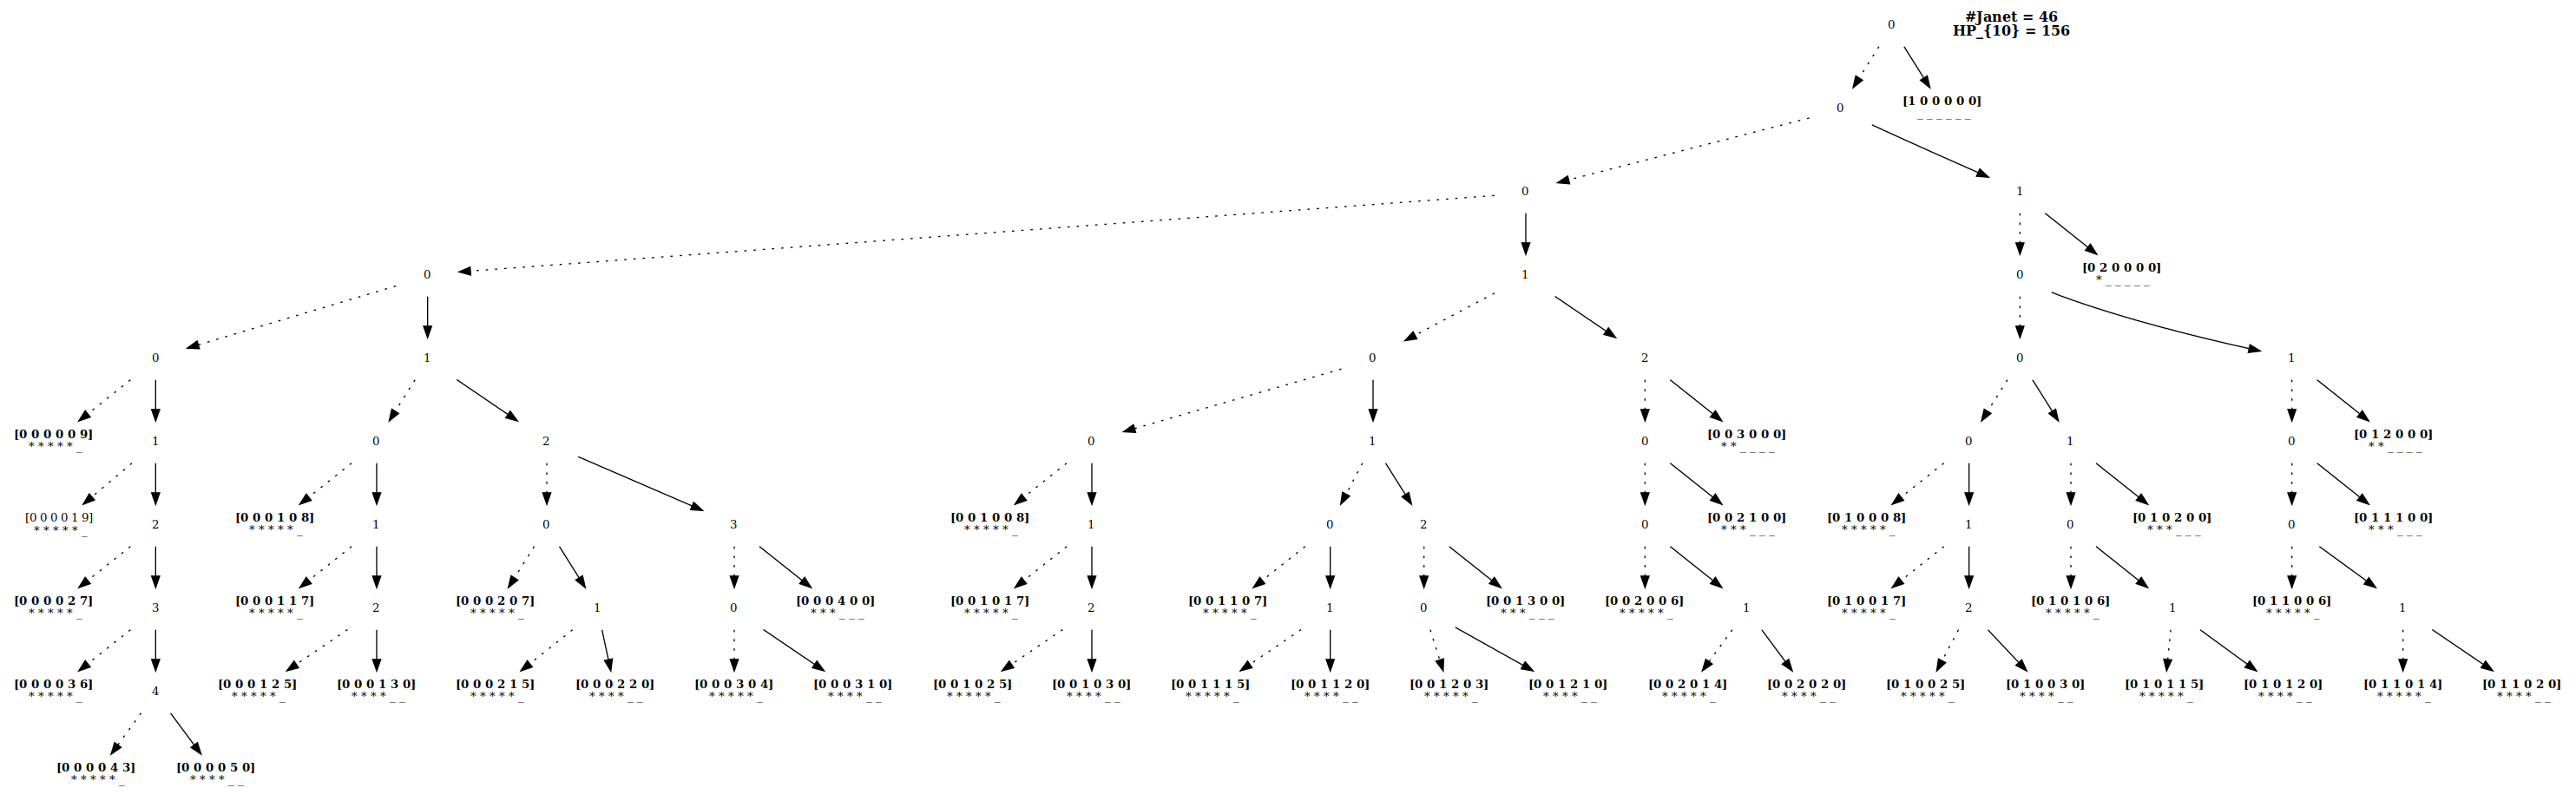

In [10]:
var = ['x1', 'x2', 'x3', 'x4', 'x5', 'x6']
fun = []
Monom.init(var, fun)
for i, g in enumerate(var):
    globals()[g] = Poly(Monom(i))
cyclic6 = Janet()
# cyclic6 = JanetCache()
res = ginvBlockLow((
x1+x2+x3+x4+x5+x6,
x1*x2+x1*x6+x2*x3+x3*x4+x4*x5+x5*x6,
x1*x2*x3+x1*x2*x6+x1*x5*x6+x2*x3*x4+x3*x4*x5+x4*x5*x6,
x1*x2*x3*x4+x1*x2*x3*x6+x1*x2*x5*x6+x1*x4*x5*x6+x2*x3*x4*x5+x3*x4*x5*x6,
x1*x2*x3*x4*x5+x1*x2*x3*x4*x6+x1*x2*x3*x5*x6+x1*x2*x4*x5*x6+x1*x3*x4*x5*x6+x2*x3*x4*x5*x6,
x1*x2*x3*x4*x5*x6-1), \
cyclic6, level=1)
print(f"crit1: {res[1]}")
print(f"crit2: {res[2]}")
print(f" time: {res[0]:.2f} sec")
print(f"    count: {cyclic6.count()}")
print(f"reduction: {cyclic6.reduction()}")
print(f"       HP: {cyclic6.HP()}")
cyclic6.saveImage('cyclic6.pdf', level=1)
cyclic6.saveImage('cyclic6.png', level=1)
Image('./cyclic6.png')

In [11]:
print(sum(1 for i in cyclic6))
print(sum(1 for i in cyclic6.GB()))

46
45


prolong 0, Q 3
z**3
prolong 0, Q 3
y**3
prolong 3, Q 3
x**3
prolong 3, Q 0
y*z**3
prolong 4, Q 4
x*z**3
prolong 4, Q 4
x*y**3
prolong 4, Q 0
y**2*z**3
prolong 5, Q 5
x*y*z**3
prolong 5, Q 5
x**2*z**3
prolong 5, Q 5
x**2*y**3
prolong 5, Q 0
x*y**2*z**3
prolong 6, Q 6
x**2*y*z**3
prolong 6, Q 6
prolong 6, Q 0
x**2*y**2*z**3
prolong 7, Q 7
prolong 7, Q 0
prolong 0, Q 0
crit1: 7
crit1: 4
 time: 0.01 sec
    count: 13
reduction: 19
       HP: 27


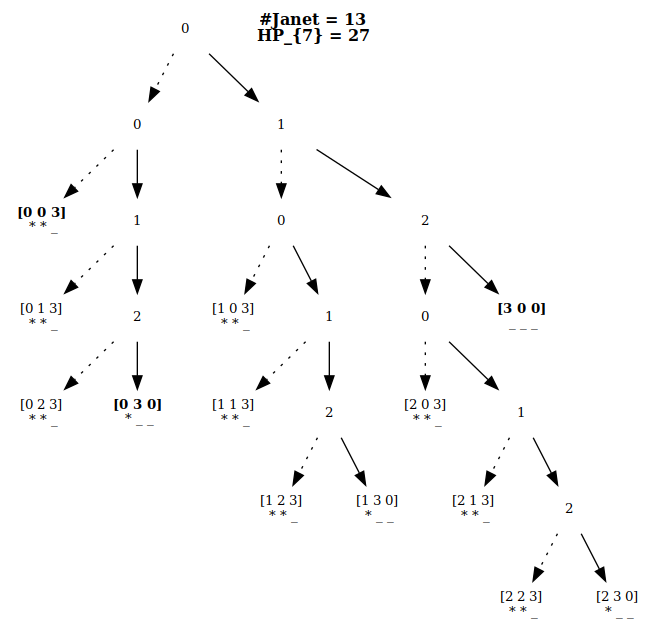

In [12]:
var = ['x', 'y', 'z']
fun = []
Monom.init(var, fun)
for i, g in enumerate(var):
    globals()[g] = Poly(Monom(i))
test = Janet()
res = ginvBlockLow((
x**3 - y**2 + z - 1,
y**3 - z**2 + x - 2,
z**3 - x**2 + y - 3), \
test, level=1)
print(f"crit1: {res[1]}")
print(f"crit1: {res[2]}")
print(f" time: {res[0]:.2f} sec")
print(f"    count: {test.count()}")
print(f"reduction: {test.reduction()}")
print(f"       HP: {test.HP()}")
test.saveImage('test.png', level=1)
Image('./test.png')

In [13]:
print(sum(1 for i in test))
print(sum(1 for i in test.GB()))

13
3


In [14]:
for w in test:
    print(w.poly)

z**3 + x**2*-1 + y + -3
y*z**3 + x**2*y*-1 + y**2 + y*-3
y**2*z**3 + x**2*y**2*-1 + y**2*-3 + z**2 + x*-1 + 2
y**3 + z**2*-1 + x + -2
x*z**3 + x*y + y**2*-1 + x*-3 + z + -1
x*y*z**3 + x*y**2 + x*y*-3 + y*z + z**2*-1 + x + y*-1 + -2
x*y**2*z**3 + x*y**2*-3 + y**2*z + x*z**2 + y*z**2*-1 + x**2*-1 + x*y + y**2*-1 + x*2 + y*-2
x*y**3 + x*z**2*-1 + x**2 + x*-2
x**2*z**3 + x**2*y + x*y**2*-1 + x**2*-3 + x*z + x*-1
x**2*y*z**3 + x**2*y**2 + x**2*y*-3 + x*y*z + x*z**2*-1 + x**2 + x*y*-1 + x*-2
x**2*y**2*z**3 + x**2*y**2*-3 + x*y**2*z + x**2*z**2 + x*y*z**2*-1 + x**2*y + x*y**2*-1 + x**2*2 + x*y*-2 + y**2*-1 + z + -1
x**2*y**3 + x**2*z**2*-1 + x**2*-2 + y**2 + z*-1 + 1
x**3 + y**2*-1 + z + -1


In [15]:
for w in test.GB():
    print(w.poly)

z**3 + x**2*-1 + y + -3
y**3 + z**2*-1 + x + -2
x**3 + y**2*-1 + z + -1


In [16]:
rows, i = {}, 0
for d in range(8):
    for m in Monom.gradus(d):
        if not test.find(m):
            print(f"{m!r}", end=", ")
            rows[m] = i
            i += 1
    print()
print(f"число корней с учетом кратности: {len(rows)}")

[0 0 0], 
[1 0 0], [0 1 0], [0 0 1], 
[2 0 0], [1 1 0], [1 0 1], [0 2 0], [0 1 1], [0 0 2], 
[2 1 0], [2 0 1], [1 2 0], [1 1 1], [1 0 2], [0 2 1], [0 1 2], 
[2 2 0], [2 1 1], [2 0 2], [1 2 1], [1 1 2], [0 2 2], 
[2 2 1], [2 1 2], [1 2 2], 
[2 2 2], 

число корней с учетом кратности: 27


In [17]:
(x**9).NF(test)

[[[0 2 2], 3],
 [[2 1 0], -3],
 [[2 0 1], 1],
 [[1 1 1], 3],
 [[0 2 1], -6],
 [[1 0 2], -2],
 [[0 1 2], 3],
 [[1 1 0], -3],
 [[0 2 0], 6],
 [[0 1 1], -7],
 [[0 0 2], 7],
 [[1 0 0], -4],
 [[0 1 0], -2],
 [[0 0 0], 2]]

In [18]:
A = [[0 for k in range(27)] for i in range(27)]
for d in range(27):
    for m, c in (x**d).NF(test):
        A[rows[m]][d] = c

In [19]:
A[0]

In [20]:
b = [0 for i in range(27)]
for m, c in (x**27).NF(test):
    b[rows[m]] = c

In [21]:
b

In [22]:
A, b = sympy.Matrix(A), sympy.Matrix(b)

In [23]:
s = sympy.linsolve((A, b))
s

In [24]:
s = s.args[0]
p = Poly(Monom((27, 0, 0))) - sum(Poly(Monom((d, 0, 0)))*s[d] for d in range(27) if s[d])
print(p)

x**27 + x**24*-9 + x**21*29 + x**19*12 + x**18*-56 + x**17*40 + x**16*-135 + x**15*203 + x**14*-311 + x**13*514 + x**12*-953 + x**11*1062 + x**10*-1319 + x**9*2992 + x**8*-2395 + x**7*3450 + x**6*-5886 + x**5*4067 + x**4*-5795 + x**3*7006 + x**2*-3316 + x*3768 + -3600


In [25]:
p.NF(test)

[]

In [26]:
x = sympy.symbols('x')
sol1 = sympy.nroots(x**27 + x**24*-9 + x**21*29 + x**19*12 + x**18*-56 
+ x**17*40 + x**16*-135 + x**15*203 + x**14*-311 + x**13*514 + x**12*-953 
+ x**11*1062 + x**10*-1319 + x**9*2992 + x**8*-2395 + x**7*3450 
+ x**6*-5886 + x**5*4067 + x**4*-5795 + x**3*7006 + x**2*-3316 + x*3768 + -3600)
for s in sol1:
    print(s)

1.16806505363572
-1.52199063063865 - 0.472367880942079*I
-1.52199063063865 + 0.472367880942079*I
-1.13465546036359 - 0.719984405712257*I
-1.13465546036359 + 0.719984405712257*I
-0.926923594142734 - 1.38896134800554*I
-0.926923594142734 + 1.38896134800554*I
-0.781159943875429 - 1.07128968143714*I
-0.781159943875429 + 1.07128968143714*I
-0.594189223657336 - 1.19894213896259*I
-0.594189223657336 + 1.19894213896259*I
-0.462799712104723 - 1.12248350526833*I
-0.462799712104723 + 1.12248350526833*I
-0.44915808581763 - 1.37356741601555*I
-0.44915808581763 + 1.37356741601555*I
0.0686714903722352 - 1.15836203522044*I
0.0686714903722352 + 1.15836203522044*I
0.404926805269033 - 1.29265863189902*I
0.404926805269033 + 1.29265863189902*I
0.923086188555943 - 0.991773946487541*I
0.923086188555943 + 0.991773946487541*I
0.931900786639237 - 0.405019715427683*I
0.931900786639237 + 0.405019715427683*I
1.43661337711015 - 0.479544062400908*I
1.43661337711015 + 0.479544062400908*I
1.52164547583563 - 0.00725529

In [27]:
from sympy.matrices.sparsetools import _doktocsr
from sympy import SparseMatrix

In [28]:
dct = [{}, {}, {}]
for k, v in rows.items():
    for i in range(3):
        for m, c in Poly(Monom(i)*k).NF(test):
            if c:
                dct[i][rows[m], v] = c

In [29]:
X = [SparseMatrix(27, 27, dct[i]) for i in range(3)]

In [30]:
X[0]*X[1] == X[1]*X[0] and X[0]*X[2] == X[2]*X[0] and X[2]*X[1] == X[1]*X[2]

True

In [31]:
print(len(_doktocsr(X[0])[0]), 27**2, len(_doktocsr(X[0])[0])/27**2)

73 729 0.10013717421124829


In [32]:
_doktocsr(X[0])

In [33]:
X765 = sympy.Matrix([[0 for k in range(27)] for i in range(27)])
for k, v in rows.items():
    for m, c in Poly(Monom((7, 6, 5))*k).NF(test):
        X765[rows[m], v] = c

In [34]:
X765 == X[1]**5*X[0]**7*X[2]**5*X[1]

True

In [35]:
sympy.zeros(27, 27) == X[0]**27 + X[0]**24*-9 + X[0]**21*29 + X[0]**19*12 + X[0]**18*-56\
+ X[0]**17*40 + X[0]**16*-135 + X[0]**15*203 + X[0]**14*-311\
+ X[0]**13*514 + X[0]**12*-953 + X[0]**11*1062 + X[0]**10*-1319\
+ X[0]**9*2992 + X[0]**8*-2395 + X[0]**7*3450 + X[0]**6*-5886\
+ X[0]**5*4067 + X[0]**4*-5795 + X[0]**3*7006 + X[0]**2*-3316 + X[0]*3768 + sympy.eye(27)*-3600

True

In [36]:
for i in range(3):
    print(f"det(X[{i}]) = {X[i].det()}")

det(X[0]) = 3600
det(X[1]) = 15407
det(X[2]) = 23905


In [37]:
import numpy as np
from scipy import linalg

In [38]:
for i in range(3):
    A = np.empty((27, 27), dtype=np.float64)
    for j in range(27):
        for k in range(27):
            A[j][k] = X[i][j, k]
    pprint(linalg.eigvals(A))

array([-1.52199063+0.47236788j, -1.52199063-0.47236788j,
       -1.13465546+0.71998441j, -1.13465546-0.71998441j,
       -0.92692359+1.38896135j, -0.92692359-1.38896135j,
       -0.78115994+1.07128968j, -0.78115994-1.07128968j,
       -0.44915809+1.37356742j, -0.44915809-1.37356742j,
       -0.59418922+1.19894214j, -0.59418922-1.19894214j,
       -0.46279971+1.12248351j, -0.46279971-1.12248351j,
        0.40492681+1.29265863j,  0.40492681-1.29265863j,
        0.06867149+1.15836204j,  0.06867149-1.15836204j,
        0.92308619+0.99177395j,  0.92308619-0.99177395j,
        1.43661338+0.47954406j,  1.43661338-0.47954406j,
        0.93190079+0.40501972j,  0.93190079-0.40501972j,
        1.52164548+0.0072553j ,  1.52164548-0.0072553j ,
        1.16806505+0.j        ])
array([-0.98229265+1.62689646j, -0.98229265-1.62689646j,
       -1.37520861+0.60158378j, -1.37520861-0.60158378j,
       -1.16658632+0.90968529j, -1.16658632-0.90968529j,
       -0.86174064+1.05517497j, -0.86174064-1.05517497j

In [39]:
var = ['x1', 'x2', 'x3', 'x4', 'x5', 'x6']
fun = []
Monom.init(var, fun)

In [40]:
%%time
rows, i = {}, 0
for d in range(10):
    for m in Monom.gradus(d):
        if not cyclic6.find(m):
            print(f"{m!r}", end=", ")
            rows[m] = i
            i += 1
    print()
print(f"число корней с учетом кратности: {len(rows)}")

[0 0 0 0 0 0], 
[0 1 0 0 0 0], [0 0 1 0 0 0], [0 0 0 1 0 0], [0 0 0 0 1 0], [0 0 0 0 0 1], 
[0 1 1 0 0 0], [0 1 0 1 0 0], [0 1 0 0 1 0], [0 1 0 0 0 1], [0 0 2 0 0 0], [0 0 1 1 0 0], [0 0 1 0 1 0], [0 0 1 0 0 1], [0 0 0 2 0 0], [0 0 0 1 1 0], [0 0 0 1 0 1], [0 0 0 0 2 0], [0 0 0 0 1 1], [0 0 0 0 0 2], 
[0 1 1 0 1 0], [0 1 1 0 0 1], [0 1 0 1 1 0], [0 1 0 1 0 1], [0 1 0 0 2 0], [0 1 0 0 1 1], [0 1 0 0 0 2], [0 0 2 0 1 0], [0 0 2 0 0 1], [0 0 1 2 0 0], [0 0 1 1 1 0], [0 0 1 1 0 1], [0 0 1 0 2 0], [0 0 1 0 1 1], [0 0 1 0 0 2], [0 0 0 3 0 0], [0 0 0 2 1 0], [0 0 0 2 0 1], [0 0 0 1 2 0], [0 0 0 1 1 1], [0 0 0 1 0 2], [0 0 0 0 3 0], [0 0 0 0 2 1], [0 0 0 0 1 2], [0 0 0 0 0 3], 
[0 1 1 0 1 1], [0 1 1 0 0 2], [0 1 0 1 1 1], [0 1 0 1 0 2], [0 1 0 0 2 1], [0 1 0 0 1 2], [0 1 0 0 0 3], [0 0 2 0 1 1], [0 0 2 0 0 2], [0 0 1 2 0 1], [0 0 1 1 1 1], [0 0 1 1 0 2], [0 0 1 0 2 1], [0 0 1 0 1 2], [0 0 1 0 0 3], [0 0 0 3 0 1], [0 0 0 2 1 1], [0 0 0 2 0 2], [0 0 0 1 2 1], [0 0 0 1 1 2], [0 0 0 1 0 3], [0 0 0

In [41]:
%%time
dct = [{} for i in range(6)]
for k, v in rows.items():
    for i in range(6):
        for m, c in Poly(Monom(i)*k).NF(cyclic6):
            if c:
                dct[i][rows[m], v] = c
print([len(dct[i]) for i in range(6)], 156*156)

[2789, 2728, 2548, 2406, 1952, 799] 24336
CPU times: user 5.34 s, sys: 58.3 ms, total: 5.4 s
Wall time: 6.24 s


In [42]:
%%time
for i in range(6):
    A = np.empty((156, 156), dtype=np.float64)
    d = dct[i]
    for j in range(156):
        for k in range(156):
            A[j][k] = d.get((j, k), 0.)
    pprint(linalg.eigvals(A))

array([ 3.73205081e+00+0.00000000e+00j,  1.86602540e+00+3.23205081e+00j,
        1.86602540e+00-3.23205081e+00j, -3.73205081e+00+0.00000000e+00j,
       -1.86602540e+00+3.23205081e+00j, -1.86602540e+00-3.23205081e+00j,
       -1.86602540e+00+3.23205081e+00j, -1.86602540e+00-3.23205081e+00j,
       -3.73205081e+00+0.00000000e+00j,  1.86602540e+00+3.23205081e+00j,
        1.86602540e+00-3.23205081e+00j,  3.73205081e+00+0.00000000e+00j,
       -1.98894015e+00+1.14831513e+00j, -1.98894015e+00-1.14831513e+00j,
       -1.98894015e+00+1.14831513e+00j, -1.98894015e+00-1.14831513e+00j,
       -2.14064877e-15+2.29663026e+00j, -2.14064877e-15-2.29663026e+00j,
       -1.55431223e-15+2.29663026e+00j, -1.55431223e-15-2.29663026e+00j,
        1.98894015e+00+1.14831513e+00j,  1.98894015e+00-1.14831513e+00j,
        1.98894015e+00+1.14831513e+00j,  1.98894015e+00-1.14831513e+00j,
       -9.30604859e-01+3.66025404e-01j, -9.30604859e-01-3.66025404e-01j,
       -1.48315131e-01+9.88940151e-01j, -1.48315131

array([ 3.73205081e+00+1.44311912e-14j,  3.73205081e+00-1.44311912e-14j,
        1.86602540e+00+3.23205081e+00j,  1.86602540e+00-3.23205081e+00j,
        1.86602540e+00+3.23205081e+00j,  1.86602540e+00-3.23205081e+00j,
       -3.73205081e+00+0.00000000e+00j, -3.73205081e+00+0.00000000e+00j,
       -1.86602540e+00+3.23205081e+00j, -1.86602540e+00-3.23205081e+00j,
       -1.86602540e+00+3.23205081e+00j, -1.86602540e+00-3.23205081e+00j,
       -1.98894015e+00+1.14831513e+00j, -1.98894015e+00-1.14831513e+00j,
       -1.98894015e+00+1.14831513e+00j, -1.98894015e+00-1.14831513e+00j,
        1.44328993e-15+2.29663026e+00j,  1.44328993e-15-2.29663026e+00j,
        2.84772206e-14+2.29663026e+00j,  2.84772206e-14-2.29663026e+00j,
        1.98894015e+00+1.14831513e+00j,  1.98894015e+00-1.14831513e+00j,
        1.98894015e+00+1.14831513e+00j,  1.98894015e+00-1.14831513e+00j,
       -7.82289728e-01+6.22914747e-01j, -7.82289728e-01-6.22914747e-01j,
       -1.48315131e-01+9.88940151e-01j, -1.48315131

array([ 3.73205081e+00+0.00000000e+00j,  1.86602540e+00+3.23205081e+00j,
        1.86602540e+00-3.23205081e+00j, -1.86602540e+00+3.23205081e+00j,
       -1.86602540e+00-3.23205081e+00j, -3.73205081e+00+0.00000000e+00j,
       -3.73205081e+00+0.00000000e+00j, -1.86602540e+00+3.23205081e+00j,
       -1.86602540e+00-3.23205081e+00j,  3.73205081e+00+0.00000000e+00j,
        1.86602540e+00+3.23205081e+00j,  1.86602540e+00-3.23205081e+00j,
       -1.98894015e+00+1.14831513e+00j, -1.98894015e+00-1.14831513e+00j,
        1.98894015e+00+1.14831513e+00j,  1.98894015e+00-1.14831513e+00j,
        1.98894015e+00+1.14831513e+00j,  1.98894015e+00-1.14831513e+00j,
       -1.98894015e+00+1.14831513e+00j, -1.98894015e+00-1.14831513e+00j,
        1.91513472e-15+2.29663026e+00j,  1.91513472e-15-2.29663026e+00j,
       -4.38538095e-15+2.29663026e+00j, -4.38538095e-15-2.29663026e+00j,
       -9.30604859e-01+3.66025404e-01j, -9.30604859e-01-3.66025404e-01j,
        7.82289728e-01+6.22914747e-01j,  7.82289728

In [43]:
var = 'a, b, c, k, f'.split(', ')
fun = []
Monom.init(var, fun)
for i, g in enumerate(var):
    globals()[g] = Poly(Monom(i))
KDV = Janet()
# cyclic5 = JanetCache()
res = ginvBlockLow((
16*a**2*b*c*k**3 - 2*a*b**3*k**4 - 2*a*b*f*k - 4*a*b*k**2 + 16*a*c*k + b**2*k**2 + 1,\
-64*a**3*c**2*k**3 - 8*a**2*b**2*c*k**4 + 8*a**2*c*f*k + 16*a**2*c*k**2 + 2*a*b**4*k**5 \
    - 2*a*b**2*f*k**2 - 28*a*b*c*k**2 - b**3*k**3 + b*f - 6*c,\
48*a**3*b*c*k**4 - 6*a**2*b**3*k**5 + 6*a**2*b*f*k**2 + 16*a**2*c*k**2 + 7*a*b**2*k**3 - a*f + 3*b*k,\
32*a**3*c*k**3 - 4*a**2*b**2*k**4 + 4*a**2*f*k + 6*a*b*k**2 + 3,\
), \
KDV, level=1)
print(f"crit1: {res[1]}")
print(f"crit2: {res[2]}")
print(f" time: {res[0]:.2f} sec")
print(f"    count: {KDV.count()}")
print(f"reduction: {KDV.reduction()}")
print(f"       HP: {KDV.HP()}")

prolong 0, Q 8
a*b**3*k**4
prolong 0, Q 8
a**2*b**2*k**4
prolong 8, Q 10
a**2*b*k**2
prolong 5, Q 10
a**2*b**2*k**2
prolong 0, Q 8
a*b**3*k**3*f
prolong 8, Q 10
a**3*c*k**4
prolong 5, Q 9
a**3*b*k**2
prolong 6, Q 9
a*b**4*k**2*f**2
prolong 8, Q 10
a*b**4*k**3*f
prolong 9, Q 9
a*b**2*k**3
prolong 6, Q 9
a*b**3*k**3
prolong 7, Q 7
b**4*k**3
prolong 7, Q 8
a*b**3*k**2*f**2, a*b**4*k**3, a*b**4*k**2*f
prolong 8, Q 9
a**4*c*k**3
prolong 6, Q 9
a**4*b*k**2
prolong 8, Q 9
a**3*b**2*k*f**3
prolong 6, Q 9
a**3*b**2*k**2
prolong 7, Q 9
a*b**3*k**2
prolong 6, Q 7
a*b**4*k**2
prolong 7, Q 7
b**5*k**2
prolong 7, Q 8
b**4*k**2*f**2, a**4*b*k*f**2, a**5*b*k*f
prolong 7, Q 9
a**5*b*k**2
prolong 8, Q 9
a**3*b**3*k*f**2, a**5*c*k**3
prolong 7, Q 10
a**3*b**3*k**2
prolong 8, Q 10
b**3*k**3
prolong 6, Q 10
b**4*k**2*f, a**2*b**2*k*f**2
prolong 7, Q 8
a**3*c*k**3
prolong 7, Q 8
a**3*c*k**2*f
prolong 7, Q 8
a**3*b**2*k*f**2
prolong 8, Q 8
a*b**2*c*k**2*f
prolong 6, Q 8
a*b**2*c*k**3
prolong 7, Q 8
a**2*c**2

prolong 7, Q 7
a**5*c**2
prolong 7, Q 8
a**2*b**2*c**3*f
prolong 8, Q 8
a**2*b**3*c**2*f
prolong 8, Q 8
a**3*b**2*c**2*f
prolong 8, Q 8
a*b**5*c*f
prolong 7, Q 8
a**3*b**3*c*f
prolong 8, Q 8
a**4*b**2*c*f
prolong 8, Q 8
a**5*b*c*f
prolong 8, Q 8
a**6*c*f
prolong 8, Q 8
a**5*b**2*f
prolong 8, Q 8
a**6*b*f
prolong 8, Q 8
a*b**5*c*k
prolong 8, Q 8
a**3*b**3*c*k
prolong 8, Q 8
a**4*b**2*c*k
prolong 8, Q 8
a**5*b*c*k
prolong 8, Q 8
a**5*b**2*k
prolong 8, Q 8
a**6*b*k
prolong 8, Q 8
a**4*b**2*c**2
prolong 8, Q 8
a**5*b*c**2
prolong 8, Q 8
a**6*c**2
prolong 8, Q 9
a**3*b**3*c**2*f
prolong 9, Q 9
a**5*b**2*c*f
prolong 9, Q 9
a**6*b*c*f
prolong 9, Q 9
a**6*b**2*f
prolong 9, Q 9
a**5*b**2*c*k
prolong 9, Q 9
a**6*b**2*k
prolong 9, Q 9
a**5*b**2*c**2
prolong 9, Q 9
a**6*b*c**2
prolong 9, Q 9
a**3*b**3*c**3*k
prolong 9, Q 10
a**6*b**2*c**2
prolong 9, Q 10
a**6*b**2*c*f
prolong 10, Q 10
a**6*b**2*c*k
prolong 10, Q 10
prolong 10, Q 0
prolong 0, Q 0
crit1: 42
crit2: 407
 time: 53.21 sec
    count: 153

In [44]:
for w in KDV.GB():
    print(w.poly)
    print()

k + f

b**3*f**2*10 + a*b*c*f*224 + b**2*c*f*-120 + a*c**2*768 + a*-6 + b*13

b**4*c*f*800 + a**3*c**2*13312 + a**2*b*c**2*-12288 + a*b**2*c**2*-5120 + a**3*-104 + a**2*b*564 + a*b**2*-886 + b**3*315

a*b*f**2*-6 + b**2*f**2*5 + a*c*f*-32 + 2

a*b**2*c*f*208 + b**3*c*f*-120 + a**2*c**2*512 + a*b*c**2*768 + a**2*-4 + a*b*12 + b**2*-5

a**2*f*4 + a*b*f*-12 + b**2*f*5 + a*c*-32

a**4*c**2*-2048 + a**3*b*c**2*3072 + a**4*16 + a**3*b*-96 + a**2*b**2*184 + a*b**3*-120 + b**4*25

